# Neural Network A Simple Perception

1. What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

Ans. Deep Learning is a subset of machine learning that uses multilayered artificial neural networks to automatically learn complex patterns from large volumes of data, especially unstructured data like images, audio, and text. It evolved from traditional machine learning as increased computational power and larger datasets made it possible to train deeper networks inspired by the human brain's neurons.

Traditional machine learning relies on handcrafted features and simpler algorithms, often performing well with less data and requiring more manual feature engineering. In contrast, deep learning methods extract features automatically through multiple layers, require larger datasets, and excel at recognizing abstract patterns, but demand more computation and data than traditional approaches.



2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?

Ans. The Perceptron is the simplest artificial neural network, consisting of a single layer of input nodes connected to a single output node, mainly used for binary classification. Each input has an associated weight, and a bias term is added. The perceptron computes the weighted sum of inputs plus bias and passes it through an activation function—usually the Heaviside step function—which outputs either 1 or 0, indicating the class. During training, the perceptron adjusts its weights and bias using the perceptron learning rule to minimize prediction errors.

Limitations:

  a) The perceptron can only classify linearly separable patterns, meaning it cannot solve problems where classes are not separated by a straight line (such as XOR).

  b) It provides only binary outputs because of its step activation function, making it unsuitable for tasks requiring multiple outputs or complex decision boundaries.



3. Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

Ans. Activation functions form a cornerstone of neural network design, determining how the network processes and transforms input data across its layers. Their primary purpose is to introduce non-linearity into the model. Without activation functions, neural networks could only model linear relationships—regardless of how many layers they have—severely limiting their capacity to learn from complex, real-world data where patterns and relationships are rarely linear. By enabling the network to capture intricate associations, activation functions help it solve problems like image recognition, speech processing, and other tasks that would be impossible with mere linear transformations.

Activation functions also play a vital role in deciding whether a particular neuron should be 'activated' or not based on the signals it receives. This selectivity lets networks focus on important information and propagate useful signals forward, while suppressing irrelevant data during training and inference.

Comparing Sigmoid, ReLU, and Tanh Functions
Sigmoid Function: The sigmoid function squashes its input into a range between 0 and 1. This makes it intuitive for binary classification tasks, where outputs should represent probabilities. However, because it compresses extreme inputs toward the ends of its scale, it can slow down learning (a phenomenon known as the vanishing gradient problem), especially in deep networks.

ReLU (Rectified Linear Unit): ReLU outputs the input directly if it's positive, and zero otherwise. It has become the default choice for hidden layers in many deep networks because it allows faster, more efficient training and helps neural networks model more complex relationships. However, if neurons get stuck in the zero region, they can stop learning—a problem called "dying ReLU."

Tanh (Hyperbolic Tangent): Tanh also squashes input values, but into a range between -1 and +1. It's often preferred over sigmoid in hidden layers because its output is centered around zero, helping with training convergence. Like sigmoid, tanh is susceptible to vanishing gradients if the input is very large or very small, slowing down the learning in deep architectures.



4. What is the difference between Loss function and Cost function in neural networks? Provide examples.

Ans. The loss function and cost function are both crucial concepts in neural networks, but they serve distinct roles. A loss function measures the difference between the actual and predicted values for a single data point, essentially quantifying how wrong the model's prediction is for that individual example. Common examples of loss functions include mean squared error for regression (for one data point: the squared difference between predicted and actual value) and binary cross-entropy for classification.

The cost function, on the other hand, typically aggregates the losses from multiple data points, providing a single value that reflects the overall performance of the model on a dataset. In practice, this is often calculated as the mean or sum of all individual losses across a batch or the entire training set. For example, the mean squared error cost for a regression problem is the average of all squared errors across data points.

In summary, the loss function is applied at the level of individual data points, while the cost function combines these losses over the dataset to guide model training and evaluation. For instance, if a model predicts house prices, the difference between its prediction and the actual price for one house would be the loss, while the average error over all houses in the training data represents the cost function.



5. What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop

Ans. Optimizers are essential components in neural networks that drive the learning process by adjusting the model's parameters, such as weights and biases, to minimize the loss or error during training. Their role is to iteratively update these parameters based on the gradients derived from the loss function, thus improving the model's predictive performance. By efficiently navigating the complex landscape of possible parameter values, optimizers help neural networks find effective solutions even for challenging and high-dimensional tasks.

Gradient Descent is the foundational optimization algorithm. It works by computing the gradient (or slope) of the loss function with respect to each parameter and then updates the parameters incrementally in the opposite direction, aiming to reach the lowest point on the loss surface. While effective, vanilla gradient descent can be slow and is sensitive to the choice of learning rate, often requiring careful tuning and sometimes struggling with getting trapped in local minima or saddle points.

Adam (Adaptive Moment Estimation) is a more advanced optimizer that combines the strengths of two other methods: momentum and adaptive learning rates. Adam keeps track of both the average of recent gradients (momentum) and the average of their squares (adaptive learning rate) for each parameter, allowing it to adjust the learning process dynamically. This often results in faster and more stable convergence, making Adam a popular choice for training deep and complex neural networks, especially when dealing with noisy data or large models.

RMSprop (Root Mean Square Propagation) is another adaptive optimizer. It modifies the learning rate for each parameter based on a running average of the magnitudes of recent gradients, which helps prevent oscillations and maintains steady progress, particularly in the presence of non-stationary objectives or mini-batch noise. RMSprop is widely used for recurrent neural networks and other architectures where gradients can fluctuate significantly.

NumPy Perceptron Predictions: [0 0 0 1]


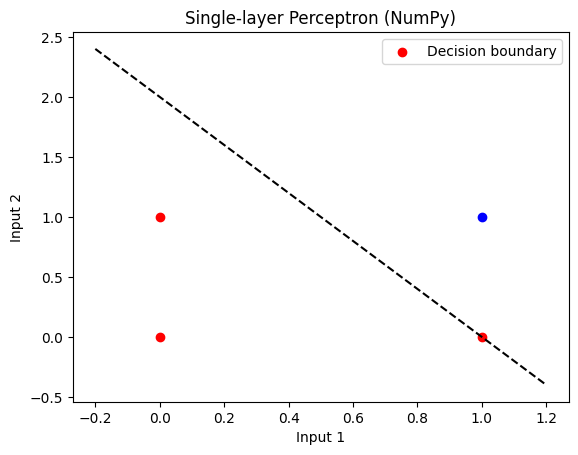

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Keras Predictions: [0 0 0 0]


In [1]:
# 6) Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: The AND gate data
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

# Step 2: Perceptron from scratch
class Perceptron:
    def __init__(self, lr=0.1, epochs=20):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                linear = np.dot(x_i, self.weights) + self.bias
                y_pred = 1 if linear >= 0 else 0
                update = self.lr * (y[i] - y_pred)
                self.weights += update * x_i
                self.bias += update
    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return np.where(linear >= 0, 1, 0)

# Train and test
perc = Perceptron()
perc.fit(data, labels)
preds = perc.predict(data)
print("NumPy Perceptron Predictions:", preds)

# Step 3: Visualize decision boundary
for point, label in zip(data, labels):
    color = 'blue' if label == 1 else 'red'
    plt.scatter(point[0], point[1], c=color)
x_vals = np.linspace(-0.2, 1.2, 10)
# Only draw the line if weights[1] != 0
if perc.weights[1] != 0:
    y_vals = -(perc.weights[0] * x_vals + perc.bias) / perc.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend(['Decision boundary'])
plt.title('Single-layer Perceptron (NumPy)')
plt.show()

# Step 4: Keras implementation for comparison
model = Sequential([Dense(1, input_shape=(2,), activation='sigmoid')])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(data, labels, epochs=20, verbose=0)
res = model.predict(data)
print("Keras Predictions:", (res > 0.5).astype(int).reshape(-1))


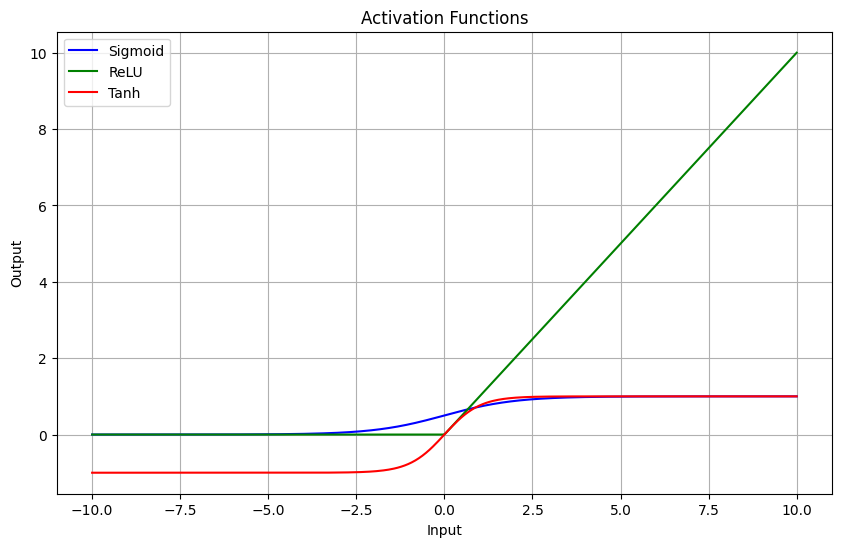

In [2]:
# 7) Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.


import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate input values
x = np.linspace(-10, 10, 400)

# Compute outputs for each activation function
sigmoid_vals = sigmoid(x)
relu_vals = relu(x)
tanh_vals = tanh(x)

# Plot all activation functions
plt.figure(figsize=(10, 6))

plt.plot(x, sigmoid_vals, label='Sigmoid', color='blue')
plt.plot(x, relu_vals, label='ReLU', color='green')
plt.plot(x, tanh_vals, label='Tanh', color='red')

plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# 8) Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),    # Flatten 2D image to 1D vector
    Dense(128, activation='relu'),    # Hidden layer with ReLU activation
    Dense(10, activation='softmax')   # Output layer for 10 classes
])

# Compile model with optimizer, loss, and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, epochs=10, batch_size=32, verbose=2)

# Print training accuracy from final epoch
final_accuracy = history.history['accuracy'][-1]
print(f"Training accuracy after 10 epochs: {final_accuracy*100:.2f}%")



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9259 - loss: 0.2601
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9674 - loss: 0.1112
Epoch 3/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9776 - loss: 0.0760
Epoch 4/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9824 - loss: 0.0577
Epoch 5/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9867 - loss: 0.0450
Epoch 6/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9894 - loss: 0.0346
Epoch 7/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9913 - loss: 0.0286
Epoch 8/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9930 - loss: 0.0226
Epoch 9/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9942 - loss: 0.0187
Epoch 10/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9953 - loss: 0.0154
Training accuracy after 10 epochs: 99.53%


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
938/938 - 7s - 8ms/step - accuracy: 0.8187 - loss: 0.5244 - val_accuracy: 0.8373 - val_loss: 0.4507
Epoch 2/20
938/938 - 5s - 5ms/step - accuracy: 0.8594 - loss: 0.3940 - val_accuracy: 0.8434 - val_loss: 0.4287
Epoch 3/20
938/938 - 6s - 6ms/step - accuracy: 0.8730 - loss: 0.3534 - val_accuracy: 0.8583 - val_loss: 0.3863
Epoch 4/20
938/938 - 5s - 6ms/step - accuracy: 0.8817 - loss: 0.3261 - val_accuracy: 0.8668 - val_loss: 0.3634
Epoch 5/20
938/938 - 6s - 7ms/step - accuracy: 0.8874 - loss: 0.3095 - val_accuracy: 0.8619 - val_loss: 0.3724
Epoch 6/20
938/938 - 11s - 12ms/step - accuracy: 0.8936 - loss: 0.2903 - val_accuracy: 0.8738 - val_loss: 0.3501
Epoch 7/20
938/938 - 6s - 6ms/step - accuracy: 0.8972 - loss: 0.2776 - val_accuracy: 0.8757 - val_loss: 0.3408
Epoch 8/20
938/938 - 5s - 5ms/ste

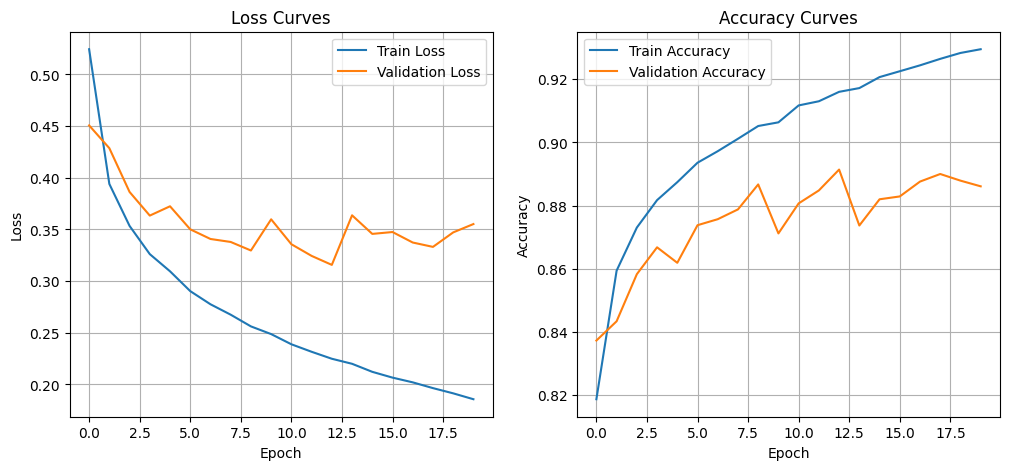

In [4]:
# 9) Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# One-hot encode labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_val_encoded = to_categorical(y_val, num_classes=10)

# Build neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model with validation
history = model.fit(x_train, y_train_encoded,
                    validation_data=(x_val, y_val_encoded),
                    epochs=20, batch_size=64, verbose=2)

# Plot training & validation loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training & validation accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


10. You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:
    ● How would you design a deep learning model (perceptron or multilayer NN)?
    ● Which activation function and loss function would you use, and why?
    ● How would you train and evaluate the model, considering class imbalance?
    ● Which optimizer would be suitable, and how would you prevent overfitting?


Ans. A multilayer neural network (MLP) is suitable here because the dataset contains structured features (transaction amount, merchant ID, customer location) that can be combined non-linearly for better discrimination. A single-layer perceptron would be too simplistic to capture complex relationships that often characterize fraud patterns. The MLP architecture might include:
    
   a) Input layer matching the number of features.
   b) Multiple hidden layers (e.g., 2-3) with decreasing number of neurons to learn hierarchical feature representations.
   c) Regularization layers like dropout to improve generalization.

Choice of Activation and Loss Functions

   a) Activation function: Use ReLU in hidden layers because it accelerates convergence during training and mitigates vanishing gradient problems common with deeper networks. For the output layer, use sigmoid since the task is binary classification (fraudulent vs legitimate).

   b) Loss function: Use binary cross-entropy loss. This function effectively quantifies the difference between the predicted probabilities and actual binary labels and is standard for such classification problems.

Training and Evaluation Considering Class Imbalance

   a) Class imbalance handling: Since fraudulent transactions are rare, implement techniques such as:
    
    Class weighting in the loss function to penalize misclassification of minority (fraud) class more heavily.
    Oversampling techniques like SMOTE or undersampling legitimate transactions in preprocessing.

   b) Evaluation metrics: Besides accuracy (which can be misleading), focus on:

Precision, recall, F1-score for the fraud class.

   a) ROC-AUC and PR-AUC curves to evaluate discrimination quality under imbalance.

   b) Use stratified splitting to maintain class distribution in train/validation sets.

Optimizer Selection and Overfitting Prevention
   
   a) Optimizer: Use Adam optimizer as it combines momentum and adaptive learning rates, ensuring efficient and stable training even with noisy and complex data.

   b) Overfitting prevention:
     
     i. Apply dropout layers in between hidden layers.
     ii. Use early stopping monitoring validation loss or F1-score.
     iii. Apply L2 regularization to weights.
     iv. Consider batch normalization to stabilize training.